In [3]:
import my_sql_routines.options_signal_loader as osl
osl.load_atm_vols_4settle_date(settle_date=20160322)


REPLACE INTO option_ticker_indicators (ticker, ticker_head, ticker_month, ticker_year,  cal_dte, tr_dte, atm_vol, price_date, created_date, last_updated_date) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)


In [1]:
import signals.option_signals as ops
ops.get_vcs_signals(ticker1='ESM2016',ticker2='ESU2016',settle_date=20160322)


{'current': {'imp_vol_ratio': 0.9148910991765964},
 'hist':       settleDates  TickerYear1  TickerMonth1  trDTE1  calDTE1  underlying1  \
 0        19940103         1994             6     116      164       467.05   
 1        19940104         1994             6     115      163       468.65   
 2        19940105         1994             6     114      162       469.20   
 3        19940106         1994             6     113      161       469.00   
 4        19940107         1994             6     112      160       472.35   
 5        19940110         1994             6     111      157       477.10   
 6        19940111         1994             6     110      156       476.45   
 7        19940112         1994             6     109      155       475.20   
 8        19940113         1994             6     108      154       474.60   
 9        19940114         1994             6     107      153       475.65   
 10       19940117         1994             6     106      150       474

In [1]:
import futures_charts.options_curve as oc
oc.get_vcs_panel_plot(ticker_list=['LCQ2016','LCV2016'],report_date=20160322)

TypeError: string indices must be integers

In [2]:
import matplotlib.pyplot as plt
plt.plot(imp_vol_ratio)
plt.grid()         
         
plt.show()

In [ ]:
import opportunity_constructs.utilities as ocu
aligned_output = ocu.get_aligned_futures_data(contract_list=['NGU2016','NGX2016','NGF2017'],aggregation_method=12,contracts_back=10,date_to=20160218)
#aligned_output = ocu.get_aligned_futures_data(contract_list=['HOV2007','HOX2007'],aggregation_method=12,contracts_back=10,date_to=20070420)
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']
#bf_price = aligned_data['c1']['close_price']-aligned_data['c2']['close_price']
#bf_price_recent = bf_price[1:]
#aligned_data_recent = aligned_data[1:]
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [1]:
import ta.abn_position_reconciler as apr
wuhu = apr.reconcile_position()
wuhu

ticker  qty_x  qty_y  qty_diff
49  RBZ2016      1     -2         3
50  RBF2017     -1      5        -6
61  KCU2016     -2     -1        -1
62  KCZ2016      2      1         1
65  SBN2017    -13    -11        -2
66  SBV2017     26     22         4
67  SBH2018    -13    -11        -2
71   BX2016     62     72       -10
72   BZ2016   -128   -148        20
73   BF2017     68     78       -10
82  RBG2017    NaN     -3       NaN

In [21]:
import opportunity_constructs.spread_carry as sc

spread_carry_output = sc.generate_spread_carry_sheet_4date(report_date=20160407)
spread_report = spread_carry_output['spread_report']
ticker_head_list = list(spread_report['tickerHead'].unique())
# Compare BO and S sizing

spread_report[spread_report['tickerHead']==ticker_head_list[19]]
#spread_report[spread_report['tickerHead']=='FC']

ticker1  ticker2 tickerHead  front_tr_dte  carry  q_carry  reward_risk  \
0  OJK2016  OJN2016         OJ            23    NaN      NaN          NaN   
1  OJN2016  OJU2016         OJ            65     15       -2         0.01   
2  OJU2016  OJX2016         OJ           109    -30       -2        -0.01   
3  OJX2016  OJF2017         OJ           151    -15      -15        -0.01   
4  OJF2017  OJH2017         OJ           192    135       18         0.07   
5  OJH2017  OJK2017         OJ           234   -120       -1        -0.25   

   price   q  upside  downside  change5  change10  change20  
0   -0.1  62  470.40   -575.10      NaN       NaN       NaN  
1   -0.2  64  309.30   -307.80      NaN       NaN       NaN  
2    0.0  66  303.00   -321.90      NaN       NaN       NaN  
3    0.1  81  165.60   -174.15      NaN       NaN       NaN  
4   -0.8  63   92.85   -220.80      NaN       NaN       NaN  
5    0.0  64   56.25   -110.10      NaN       NaN       NaN

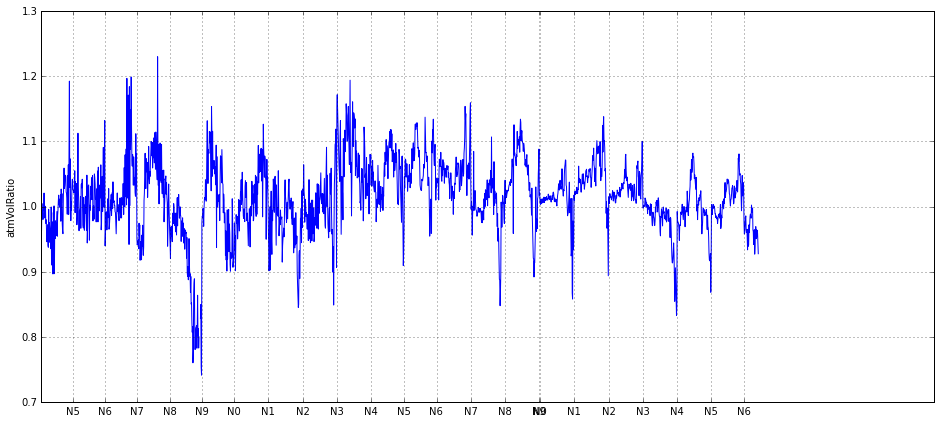

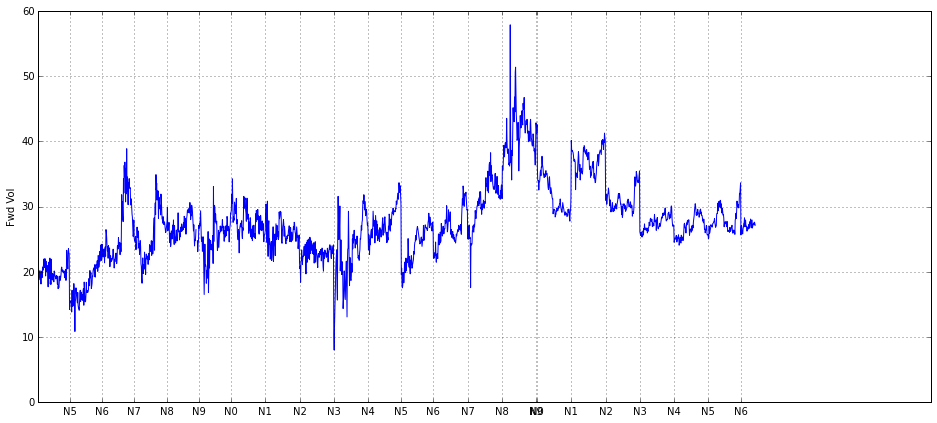

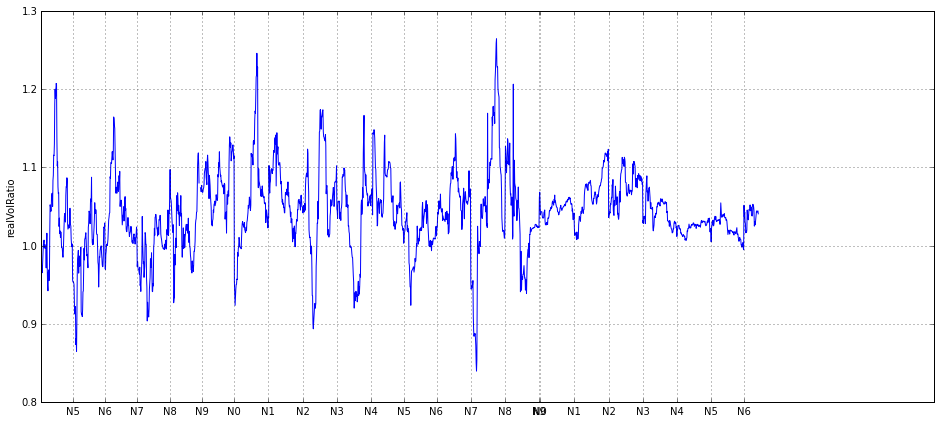

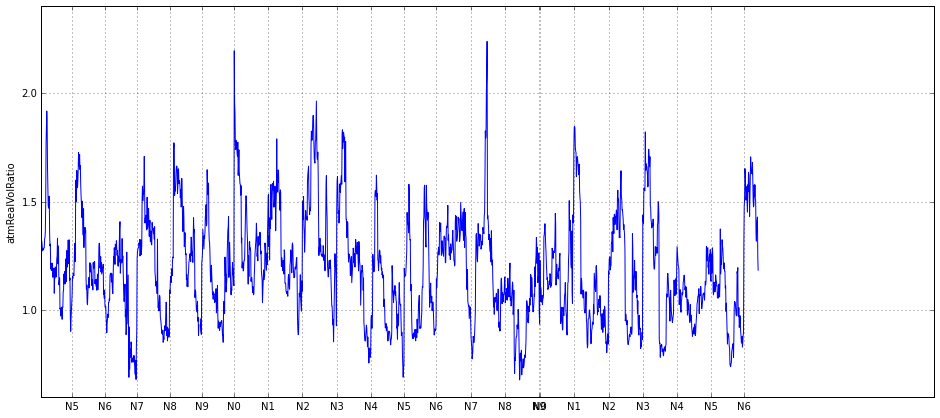

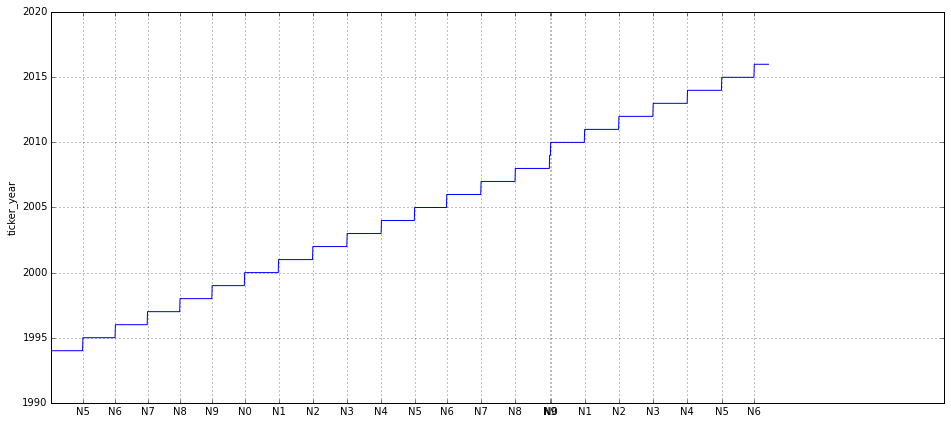

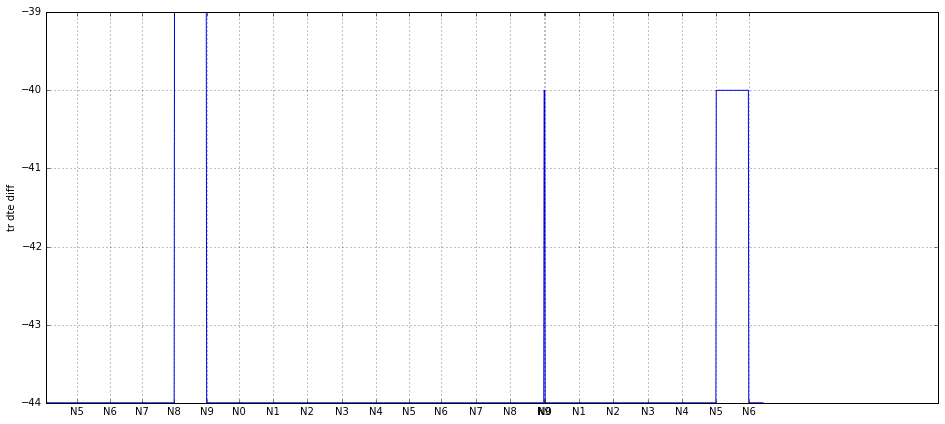

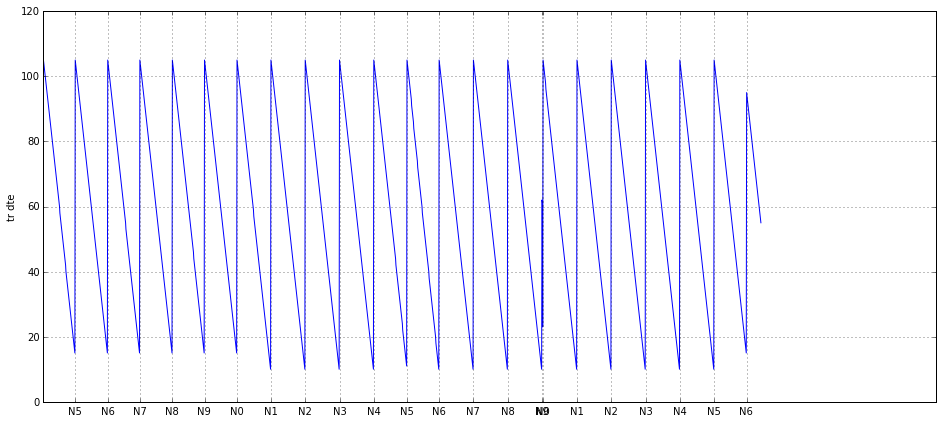

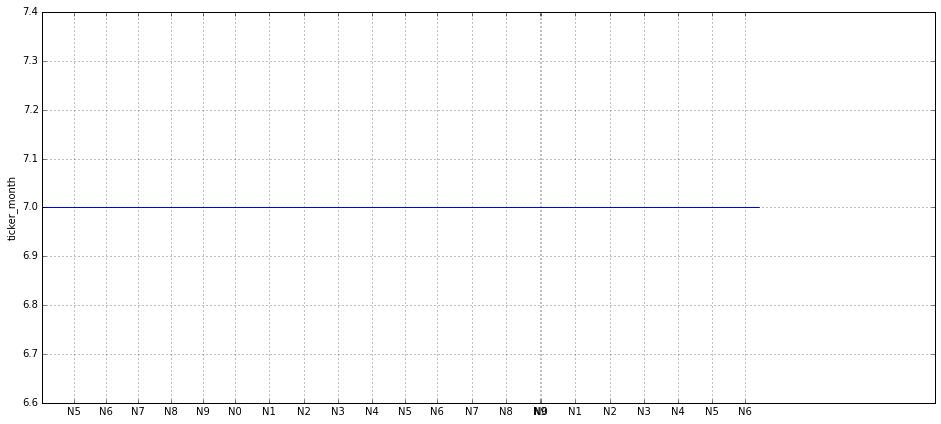

In [1]:
import futures_charts.options_curve as ocr
%matplotlib inline
ocr.get_vcs_panel_plot(ticker_list=['WN2016','WU2016'],report_date = 20160407,diagnostics_q=True)


In [3]:
import formats.futures_strategy_formats as fsf
fsf.generate_futures_butterfly_formatted_output()

In [4]:
import ta.prepare_daily as prep
prep.prepare_strategy_daily(strategy_class='vcs')

In [1]:
import opportunity_constructs.vcs as vcs
wuhu = vcs.generate_vcs_sheet_4date(date_to=20160407)
wuhu['vcs_pairs']

ticker1  ticker2 tickerHead tickerClass  trDte1  trDte2   Q  QF  fwdVolQ  \
0   ADM2016  ADU2016         AD          FX      40     108  66  44       51   
1   ADU2016  ADZ2016         AD          FX     108     172  74  72       43   
2   ADZ2016  ADH2017         AD          FX     172     228 NaN NaN      NaN   
3   BON2016  BOQ2016         BO          Ag      55      74  72   7       18   
4   BOQ2016  BOU2016         BO          Ag      74      99  63  57       18   
5   BOU2016  BOV2016         BO          Ag      99     118  40  38       38   
6   BOV2016  BOZ2016         BO          Ag     118     162  47  98       32   
7   BOZ2016  BOF2017         BO          Ag     162     182  48  49       33   
8   BPM2016  BPU2016         BP          FX      40     108   1  15       95   
9   BPU2016  BPZ2016         BP          FX     108     172  94  87       76   
10  BPZ2016  BPH2017         BP          FX     172     228 NaN NaN      NaN   
11   CN2016   CU2016          C          Ag      55      99   8   5       15   
12   CU2016   CZ2016          C          Ag      99     162   5  10       54   
13   CZ2016   CH2017          C          Ag     162     223 NaN  72      NaN   
14   CH2017   CK2017          C          Ag     223     262 NaN  25      NaN   
15   CK2017   CN2017          C          Ag     262     306 NaN  18      NaN   
16   CN2017   CZ2017          C          Ag     306     413  60  21       23   
17  CDM2016  CDU2016         CD          FX      40     108  81  41       65   
18  CDU2016  CDZ2016         CD          FX     108     172 NaN NaN      NaN   
19  CDZ2016  CDH2017         CD          FX     172     228 NaN NaN      NaN   
20  CLN2016  CLQ2016         CL      Energy      49      69  36  15       90   
21  CLQ2016  CLU2016         CL      Energy      69      92  28  13       94   
22  CLU2016  CLV2016         CL      Energy      92     112  30  10       94   
23  CLV2016  CLX2016         CL      Energy     112     134  21   3       98   
24  CLX2016  CLZ2016         CL      Energy     134     156  51  41       94   
25  CLZ2016  CLF2017         CL      Energy     156     176  49  26       95   
26  CLF2017  CLG2017         CL      Energy     176     196  58  59       92   
27  CLG2017  CLH2017         CL      Energy     196     217  20   2       99   
28  CLH2017  CLJ2017         CL      Energy     217     237  25 NaN       98   
29  CLJ2017  CLK2017         CL      Energy     237     258 NaN NaN      NaN   
..      ...      ...        ...         ...     ...     ...  ..  ..      ...   
60  LCG2017  LCJ2017         LC   Livestock     209     253 NaN  98      NaN   
61  LCJ2017  LCM2017         LC   Livestock     253     291 NaN  99      NaN   
62  LNM2016  LNN2016         LN   Livestock      47      69  74  41       26   
63  LNN2016  LNQ2016         LN   Livestock      69      89  61  39       28   
64  LNQ2016  LNV2016         LN   Livestock      89     133  64  90       20   
65  LNV2016  LNZ2016         LN   Livestock     133     175  26   3       44   
66  LNZ2016  LNG2017         LN   Livestock     175     216  73  72       22   
67  LNG2017  LNJ2017         LN   Livestock     216     258  13  13       82   
68   SN2016   SQ2016          S          Ag      55      74  15   1        5   
69   SQ2016   SU2016          S          Ag      74      99  30  41        9   
70   SU2016   SX2016          S          Ag      99     138  33  49       17   
71   SX2016   SF2017          S          Ag     138     182  36  36       17   
72   SF2017   SH2017          S          Ag     182     223 NaN  46      NaN   
73   SH2017   SN2017          S          Ag     223     306 NaN NaN      NaN   
74   SN2017   SX2017          S          Ag     306     394  33   1       30   
75  SIN2016  SIU2016         SI       Metal      56      98  37  33       44   
76  SIU2016  SIZ2016         SI       Metal      98     160  33  43       45   
77  SMN2016  SMQ2016         SM          Ag      55      74  32  23       12   
78  

In [3]:
report_date = 20160406
contracts_back = 20
import shared.calendar_utilities as cu

from datetime import datetime
from dateutil.relativedelta import relativedelta

three_yrs_ago = cu.convert_doubledate_2datetime(report_date) - relativedelta(years=3)
three_yrs_ago

datetime.datetime(2013, 4, 6, 0, 0)

In [5]:
from pandas.tseries.offsets import CustomBusinessDay
import contract_utilities.expiration as exp

bday_us = CustomBusinessDay(expcalendar=exp.get_calendar_4ticker_head('CL'))

bday_us

<CustomBusinessDay>

In [10]:
import h5py
import get_price.get_options_price as gop
import pandas as pd
f = h5py.File('C:\Research/data/alignedTimeSeriesOutputTemp/BP1_0.5_BS_20_510204060_180.mat')
wuhu = f['alignedDataMatrix']
wow = wuhu.value
wow
column_names = gop.get_column_names_4option_data()
column_names

data_frame_out = pd.DataFrame(wow.transpose(), columns=column_names)
data_frame_out

bu_dts = pd.date_range(pd.datetime(2016, 4, 5), periods=1, freq=bday_us)
bu_dts

DatetimeIndex(['2016-04-05'], dtype='datetime64[ns]', freq='C', tz=None)

In [35]:
import signals.utils as su
import numpy as np
import get_price.get_futures_price as gfp
wuhu_1 = su.get_bus_dates_from_agg_method_and_contracts_back(ref_date=20160406,aggregation_method=1,contracts_back=20)
wuhu_2 = su.get_bus_dates_from_agg_method_and_contracts_back(ref_date=20160506,aggregation_method=1,contracts_back=20)

[wuhu_1[0],wuhu_2[0]]


wuhu = gfp.get_futures_price_preloaded(ticker_head='ES')
cont_indx_unique = wuhu['cont_indx'].unique()

wuhu = wuhu[wuhu['cal_dte']<270]
wuhu[['cont_indx','settle_date']]
wuhu.sort(['cont_indx','settle_date'],ascending=[True,True],inplace=True)

grouped = wuhu.groupby('cont_indx')
grouped.shift(1)
wuhu
shifted = grouped.shift(1)

wuhu['return'] = np.log(wuhu['close_price']/shifted['close_price'])
# tested this, correctly done! wuhu['return_2'] = wuhu['close_price']-shifted['close_price']

roll_tr_dte_aim = 40

wuhu['tr_dte_diff']=abs(40-wuhu['tr_dte'])
wuhu['tr_dte_diff']

wuhu.sort(['settle_date','tr_dte_diff'],ascending=[True,True],inplace=True)
wuhu.drop_duplicates('settle_date', inplace=True, take_last=False)

wuhu

import matplotlib.pyplot as plt
plt.plot(wuhu['return'])
plt.grid()         
         
plt.show()

In [1]:
import get_price.get_options_price as gop
skew_output = gop.get_options_price_from_db(column_names=['delta', 'imp_vol', 'cal_dte', 'tr_dte'], ticker='LNZ2016',settle_date=20160404)
skew_output

delta     imp_vol  cal_dte  tr_dte
0    1.00000000        None      254     178
1    1.00000000        None      254     178
2    0.98224668  0.25559422      254     178
3    0.97269129  0.25511801      254     178
4    0.96338030  0.24462104      254     178
5    0.95016844  0.23522942      254     178
6    0.93003038  0.22918313      254     178
7    0.90338681  0.22317761      254     178
8    0.87024594  0.21599164      254     178
9    0.82666476  0.21090032      254     178
10   0.77525016  0.20431166      254     178
11   0.71364630  0.19867220      254     178
12   0.64291909  0.19409367      254     178
13   0.56575793  0.18846562      254     178
14   0.48360355  0.18262023      254     178
15   0.39992592  0.17742706      254     178
16   0.31924050  0.17298751      254     178
17   0.24462369  0.16853090      254     178
18   0.18067695  0.16509681      254     178
19   0.12971219  0.16295201      254     178
20   0.09261244  0.16282004      254     178
21   0.06387104  0.16210972      254     178
22   0.04473875  0.16316667      254     178
23   0.03116616  0.16443186      254     178
24   0.02364147  0.16875437      254     178
25   0.01635985  0.16988836      254     178
26   0.00896938  0.16518726      254     178
27   0.00854385  0.17468324      254     178
28  -0.00513513  0.27312530      254     178
29  -0.00964298  0.27176266      254     178
30  -0.01438062  0.26166078      254     178
31  -0.02298360  0.25690066      254     178
32  -0.03216227  0.24573713      254     178
33  -0.04541958  0.23619555      254     178
34  -0.06565077  0.23010826      254     178
35  -0.09250103  0.22422746      254     178
36  -0.12587265  0.21720389      254     178
37  -0.16790272  0.21042916      254     178
38  -0.21974166  0.20429478      254     178
39  -0.28161467  0.19904043      254     178
40  -0.35185230  0.19351721      254     178
41  -0.42924345  0.18831033      254     178
42  -0.51132164  0.18281997      254     178
43  -0.59564643  0.17677073      254     178
44  -0.67617285  0.17266382      254     178
45  -0.75033148  0.16856419      254     178
46  -0.81358899  0.16554210      254     178
47  -0.86748270  0.16161322      254     178
48  -0.90430986  0.16152822      254     178
49  -0.93303895  0.16061378      254     178
50  -0.95232549  0.16120783      254     178
51  -0.96649495  0.16126368      254     178
52  -0.97466788  0.16387767      254     178
53  -1.00000000        None      254     178
54  -1.00000000        None      254     178
55  -1.00000000        None      254     178

In [2]:
import ta.cme_direct_fill_loader as cdfl
wuhu = cdfl.get_formatted_cme_direct_fills()
wuhu['aggregate_trades']

trade_price  trade_quantity  ticker  \
ticker option_type strike_price side                                        
WU2016 C           490          Sell    31.041667              -3  WU2016   
       P           490          Sell    31.875000              -3  WU2016   
WZ2016 C           500          Buy     39.250000               3  WZ2016   
       P           500          Buy     35.791667               3  WZ2016   

                                     ticker_head instrument option_type  \
ticker option_type strike_price side                                      
WU2016 C           490          Sell           W          O           C   
       P           490          Sell           W          O           P   
WZ2016 C           500          Buy            W          O           C   
       P           500          Buy            W          O           P   

                                      strike_price  
ticker option_type strike_price side                
WU2016 C           490          Sell           490  
       P           490          Sell           490  
WZ2016 C           500          Buy            500  
       P           500          Buy            500

In [2]:
import ta.pnl as tpnl
import pandas as pd
wuhu = tpnl.get_strategy_pnl_4day(alias='WZ16U16VCS',pnl_date=20160401)
wuhu

{'intraday_pnl': 0, 'pnl_per_ticker': Empty DataFrame
 Columns: [pnl_position, pnl_intraday, pnl_total]
 Index: [], 'pnl_per_tickerhead': Empty DataFrame
 Columns: [pnl_position, pnl_intraday, pnl_total]
 Index: [], 'position_pnl': 0, 't_cost': 0, 'total_pnl': 0}

In [3]:
import get_price.get_options_price as gop
wuhu = gop.get_options_price_from_db(ticker='WU2016',settle_date=20160401,strike=490,option_type='C')
wuhu['close_price']

0    32.87500000
Name: close_price, dtype: object

In [3]:
import ta.tt_fill_loader as tfl
aggregate_trades = tfl.get_formatted_tt_fills()

aggregate_trades.loc[(slice(None),'S'),'trade_quantity']=-aggregate_trades.loc[(slice(None),'S'),'trade_quantity']

aggregate_trades

trade_price  trade_quantity
ticker B/S                             
BF2017 S          41.87              -2
BG2017 B          42.25               2
BK2017 B          43.38               2
BM2017 S          43.70              -2
CH2017 B         376.00               7
CK2017 S         381.75              -7

In [1]:
import signals.option_signals as ops
wuhu = ops.get_aligned_option_indicators(ticker_list=['ESK2016','ESM2016'],settle_date=20160331)

wuhu

[     settleDates  TickerYear  TickerMonth  trDTE  calDTE  underlying  \
 0       20000309        2000            5     50      71      1422.5   
 1       20000310        2000            5     49      70      1417.8   
 2       20000313        2000            5     48      67      1401.5   
 3       20000314        2000            5     47      66      1380.0   
 4       20000315        2000            5     46      65      1413.2   
 5       20000316        2000            5     45      64      1478.0   
 6       20000317        2000            5     44      63      1489.0   
 7       20000320        2000            5     43      60      1478.1   
 8       20000321        2000            5     42      59      1507.5   
 9       20000322        2000            5     41      58      1517.5   
 10      20000323        2000            5     40      57      1544.0   
 11      20000324        2000            5     39      56      1555.4   
 12      20000327        2000            5     38  

In [1]:
tr_dte1 = 36
tr_dte2 = 55
import contract_utilities.contract_meta_info as cmi
import numpy as np
import signals.option_signals as ops

tr_dte_list = [36,55]
ref_tr_dte_list = []

selection_matrix = []

for i in range(2):
    ref_tr_dte_list.append([y for y in cmi.aligned_data_tr_dte_list if y <= tr_dte_list[i]+15 and y>=tr_dte_list[i]-15])

    
ops.get_ranked_contract_selection_4vol_strategies(ref_tr_dte_list=ref_tr_dte_list,tr_dte_list=tr_dte_list)
    
    


[[2, 2], [1, 2], [3, 3], [4, 3], [0, 1], [5, 4]]

In [8]:
print(ref_tr_dte_list)

print(tr_dte_list)

[[25, 30, 35, 40, 45, 50], [40, 45, 50, 60, 70]]
[36, 55]


In [19]:
cmi.aligned_data_tr_dte_list

[10,
 15,
 20,
 25,
 30,
 35,
 40,
 40,
 45,
 50,
 60,
 70,
 80,
 90,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 330,
 360,
 390]

In [4]:
import signals.option_signals as ops
%time ops.calc_realized_vol_4options_ticker(ticker='LNJ2016',settle_date=20160328,futures_data_dictionary=futures_data_dictionary)

Wall time: 11 ms


19.039079461389555

In [5]:
%time ops.calc_realized_vol_4options_ticker(ticker='LNJ2016',settle_date=20160328)

Wall time: 52 ms


19.039079461389555

In [18]:
import option_models.utils as omu
%time omu.get_option_underlying(ticker='LNJ2016')

Wall time: 0 ns


'LNJ2016'

In [3]:
import get_price.get_futures_price as gfp 
import numpy as np
data = gfp.get_futures_price_preloaded(ticker='GCM2016')
logreturns  = np.log(data['close_price'][-21:]/data['close_price'][-21:].shift(1))
np.sqrt(252*logreturns.var())

0.18669374729051541

In [1]:
import signals.option_signals as os
os.calc_realized_vol_4futures_ticker(ticker='GCM2016',settle_date=20160324)

18.22549244806024

In [3]:
import signals.option_signals as os
os.calc_realized_vol_4options_ticker(ticker='GCQ2016',settle_date=20160324)




18.192859441745874

In [1]:
import signals.option_signals as os
os.calc_realized_vol_4futures_ticker(ticker='GCM2016',settle_date=20160324)

settle_date   ticker ticker_head  ticker_month  ticker_year  cal_dte  \
283  2016-02-17  GCM2016          GC             6         2016      132   
284  2016-02-18  GCM2016          GC             6         2016      131   
285  2016-02-19  GCM2016          GC             6         2016      130   
286  2016-02-22  GCM2016          GC             6         2016      127   
287  2016-02-23  GCM2016          GC             6         2016      126   
288  2016-02-24  GCM2016          GC             6         2016      125   
289  2016-02-25  GCM2016          GC             6         2016      124   
290  2016-02-26  GCM2016          GC             6         2016      123   
291  2016-02-29  GCM2016          GC             6         2016      120   
292  2016-03-01  GCM2016          GC             6         2016      119   
293  2016-03-02  GCM2016          GC             6         2016      118   
294  2016-03-03  GCM2016          GC             6         2016      117   
295  2016-03-04  GCM2016          GC             6         2016      116   
296  2016-03-07  GCM2016          GC             6         2016      113   
297  2016-03-08  GCM2016          GC             6         2016      112   
298  2016-03-09  GCM2016          GC             6         2016      111   
299  2016-03-10  GCM2016          GC             6         2016      110   
300  2016-03-11  GCM2016          GC             6         2016      109   
301  2016-03-14  GCM2016          GC             6         2016      106   
302  2016-03-15  GCM2016          GC             6         2016      105   
303  2016-03-16  GCM2016          GC             6         2016      104   
304  2016-03-17  GCM2016          GC             6         2016      103   
305  2016-03-18  GCM2016          GC             6         2016      102   
306  2016-03-21  GCM2016          GC             6         2016       99   
307  2016-03-22  GCM2016          GC             6         2016       98   
308  2016-03-23  GCM2016          GC             6         2016       97   
309  2016-03-24  GCM2016          GC             6         2016       96   

     tr_dte  close_price  volume  cont_indx  change1  change2  change5  \
283      92       1211.8    4759     201606      4.5    -16.2     12.6   
284      91       1226.8    8274     201606    -20.7     -8.2    -10.3   
285      90       1231.3    2784     201606     12.5     29.1     24.5   
286      89       1210.6    2108     201606     16.6     16.3      8.4   
287      88       1223.1    8964     201606     -0.3    -18.7      2.9   
288      87       1239.7    9454     201606    -18.4     -4.3     19.7   
289      86       1239.4   11020     201606     14.1     10.5     50.7   
290      85       1221.0    5930     201606     -3.6      7.5     30.0   
291      84       1235.1   13802     201606     11.1     27.6     32.6   
292      83       1231.5    7149     201606     16.5     29.1     15.9   
293      82       1242.6   13943     201606     12.6      6.0     14.9   
294      81       1259.1   17877     201606     -6.6     -7.6    -11.0   
295      80       1271.7   21581     201606     -1.0     -6.6    -18.7   
296      79       1265.1   37467     201606     -5.6      9.9    -31.9   
297      78       1264.1   19921     201606     15.5      2.2    -27.5   
298      77       1258.5   34090     201606    -13.3    -27.6     -7.7   
299      76       1274.0   26687     201606    -14.3    -28.5     -5.2   
300      75       1260.7   30183     201606    -14.2    -15.4     -0.7   
301      74       1246.4   30613     201606     -1.2     34.1     18.1   
302      73       1232.2   21088     201606     35.3     24.5     -5.4   
303      72       1231.0   21870     201606    -10.8    -20.6    -42.8   
304      71       1266.3   20322     201606     -9.8     -5.2      NaN   
305      70       1255.5   22539     201606      4.6    -20.1      NaN   
306      69       1245.7   56074     201606    -24.7    -26.8      NaN   
307      68       1250.3 

In [5]:
import copy as cpy
my_dict = {'a':1,'b':2}
my_dict_2 = cpy.deepcopy(my_dict)
my_dict_2.pop('a')

print(my_dict_2)
print(my_dict)

{'b': 2}
{'a': 1, 'b': 2}


In [ ]:
import read_exchange_files.process_cme_futures as pcf
import read_exchange_files.read_cme_files as rcf
cme_output = pcf.process_cme_futures_4tickerhead(ticker_head='RB', report_date=20160225)
#data_read_out = rcf.read_cme_future_settle_csv_files(file_name='nymex_futures', report_date=20160224)
#title_frame = data_read_out['title_frame']
#title_frame
#title_frame[title_frame['ticker_head']=='LN']

#data_read_out[data_read_out['ticker_head']=='CL']

#data_read_out['month_strike_list'][68]
cme_output['settle_frame']

In [ ]:
import get_price.get_futures_price as gfp
import shared.calendar_utilities as cu
import contract_utilities.expiration as exp
price_frame = gfp.get_futures_price_preloaded(ticker_head='ED',settle_date=20160225)
price_frame.sort('tr_dte',ascending=True,inplace=True)


exp_date = 20170225


exp_datetime = cu.convert_doubledate_2datetime(exp_date)

price_frame['exp_date'] = [exp.get_futures_expiration(x) for x in price_frame['ticker']]
price_frame = price_frame[price_frame['exp_date']<exp_datetime]

price_frame['implied_rate'] = 100-price_frame['close_price']

price_frame[['implied_rate','exp_date','cal_dte']]


In [ ]:
[1+(price_frame['implied_rate'].iloc[x]*(price_frame['cal_dte'].iloc[x+1]-price_frame['cal_dte'].iloc[x])/36500) for x in range(len(price_frame.index)-1)]

1+(price_frame['implied_rate'].iloc[0]*price_frame['cal_dte'].iloc[0]/365000)


1+((price_frame['implied_rate'].iloc[-1]*((exp_datetime-price_frame['exp_date'].iloc[-1].to_datetime()).days))/365000)


In [6]:
import interest_curve.get_rate_from_stir as grfs
wuhu = grfs.get_simple_rate(as_of_date=20160216,date_to=20160718)

print(wuhu['rate_output'])

wuhu['price_frame']



0.00648406165771


ticker  cal_dte   exp_date  implied_rate
126   EDG2016       -1 2016-02-15        0.6182
2500  EDH2016       27 2016-03-14        0.6375
82    EDJ2016       62 2016-04-18        0.6550
61    EDK2016       90 2016-05-16        0.6600
2432  EDM2016      118 2016-06-13        0.6650
20    EDN2016      153 2016-07-18        0.6750
1     EDQ2016      181 2016-08-15        0.6850
2369  EDU2016      216 2016-09-19        0.7000
2305  EDZ2016      307 2016-12-19        0.7500
2244  EDH2017      391 2017-03-13        0.7950
2178  EDM2017      489 2017-06-19        0.8500
2109  EDU2017      580 2017-09-18        0.9100
2054  EDZ2017      671 2017-12-18        0.9850
1984  EDH2018      762 2018-03-19        1.0550
1920  EDM2018      853 2018-06-18        1.1300
1856  EDU2018      944 2018-09-17        1.2050
1792  EDZ2018     1035 2018-12-17        1.2900
1731  EDH2019     1126 2019-03-18        1.3600
1668  EDM2019     1217 2019-06-17        1.4400
1604  EDU2019     1308 2019-09-16        1.5150
1540  EDZ2019     1399 2019-12-16        1.5950

In [3]:
import numpy as np
print(wuhu['middle_discount'])

print(wuhu['total_discount'])

print(wuhu['first_rate'])
print(wuhu['first_period'])

print(wuhu['last_rate'])
print(wuhu['last_period'])

print(wuhu['total_period'])

print(np.prod(np.array(wuhu['middle_discount'])))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500)))
print((1+(wuhu['last_rate']*wuhu['last_period']/36500)))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500))*
      (1+(wuhu['last_rate']*wuhu['last_period']/36500))*
     np.prod(np.array(wuhu['middle_discount'])))

KeyError: 'middle_discount'

In [1]:
import get_price.presave_price as pp
pp.generate_and_update_futures_data_files(ticker_head_list='cme_futures')
#data_out = pp.generate_and_update_futures_data_file_4tickerhead(ticker_head='B')
#data_out[data_out['ticker']=='BZ2016']

In [ ]:

import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
import futures_charts.futures_curve as fc
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=195)

In [ ]:
aligned_output = bf_signals_output['aligned_output']
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']

In [5]:
import matplotlib.pyplot as plt
plt.plot(wuhu['c1']['atm_vol']/wuhu['c2']['atm_vol'])
plt.grid()         
         
plt.show()

In [ ]:
bad_data = aligned_data[bf_price<-0.004]   #<-0.03
bad_data

# HOV2007,HOX2007, HOZ2007 20070213 to 20070413

In [ ]:
aligned_data.iloc[1047]

In [ ]:
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160208,ext='comex_options_csv_address')
options_data_dir

In [ ]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
report_date

In [ ]:
import scheduled_jobs.options_data_load_job as odlj
import shared.downloads as sd
sd.download_csv_from_web(web_address=odlj.comex_options_csv_address)


In [ ]:
import scheduled_jobs.options_data_load_job

In [ ]:
with open(r'C:\Research\data\options_data_raw\2016\201602\20160208\interest_rate.pkl','rb') as handle:
    wuhu = pickle.load(handle)

In [ ]:
scatter_matrix = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix +=(all_samples[:,i].reshape(3,1)).dot(
    (all_samples[:,i].reshape(3,1)-mean_vector).T)
print('Scatter Matrix\n',scatter_matrix)    

In [ ]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed
matrix_w

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_dataframe.index,(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-
         merged_dataframe['BOK2016']['close_price'])
         
         
plt.show()

In [ ]:
(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-merged_dataframe['BOK2016']['close_price']

In [ ]:


import matplotlib.pyplot as plt
plt.plot(range(len(aligned_dataframe.index)),aligned_dataframe['c1']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c2']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c3']['tr_dte'])
plt.grid()         
         
plt.show()

    

    

In [ ]:
merged_dataframe['c1']['tr_dte'].isnull().sum()
merged_dataframe['c3']['tr_dte'].isnull().sum()

In [ ]:
futures_dataframe

In [ ]:
print(trDte1)
print(trDte2)
print(trDte3)

In [ ]:
bf_price = (aligned_dataframe['c1']['close_price']+aligned_dataframe['c3']['close_price'])/2-aligned_dataframe['c2']['close_price']

In [ ]:
plt.plot(range(len(aligned_dataframe.index)),bf_price)
plt.grid()         
         
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(price_ratio)
plt.grid()
plt.show()

In [ ]:
import numpy as np
nan_matrix = np.empty((2,2))
nan_matrix[:] = np.NAN
nan_matrix